# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [11]:
!pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]-273.15 #converting to degrees celcius(C= K- 273.15)
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#print(json.dumps(city_weather, indent = 4, sort_keys= True))
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
City not found. Skipping...
Processing Record 2 of Set 1 | miri
City not found. Skipping...
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | albany
City not found. Skipping...
Processing Record 5 of Set 1 | vila velha
City not found. Skipping...
Processing Record 6 of Set 1 | lahat
City not found. Skipping...
Processing Record 7 of Set 1 | grytviken
City not found. Skipping...
Processing Record 8 of Set 1 | wailua homesteads
City not found. Skipping...
Processing Record 9 of Set 1 | wenling
City not found. Skipping...
Processing Record 10 of Set 1 | nikolayevsk-on-amure
City not found. Skipping...
Processing Record 11 of Set 1 | seven pagodas
City not found. Skipping...
Processing Record 12 of Set 1 | tralee
City not found. Skipping...
Processing Record 13 of Set 1 | remire-montjoly
City not found. Skipping...
Processing Record 14 of Set 1 | 

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


Series([], dtype: int64)

In [24]:
# Define the path to your CSV file
csv_file_path = "city_data.csv"

# Read the CSV file into a DataFrame
city_data_df = pd.read_csv(csv_file_path)

# Show Record Count
city_data_df.count()


City_ID       577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [25]:
# Display the first few rows of the DataFrame to verify the data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

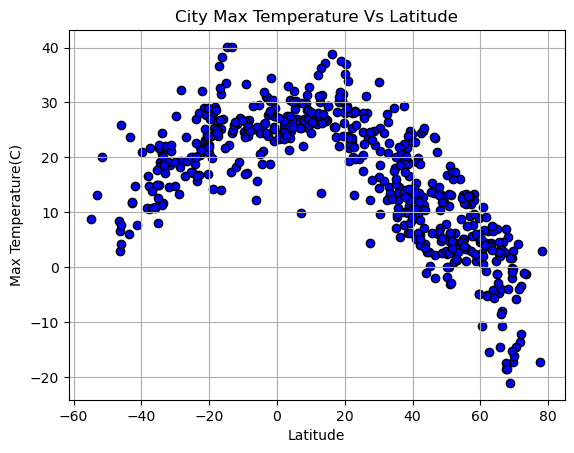

In [29]:
# Build scatter plot for latitude vs. temperature
#celsius= [ (temp - 273.15) for temp in city_data_df["Max Temp"]]
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor="blue", edgecolor= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Temperature Vs Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

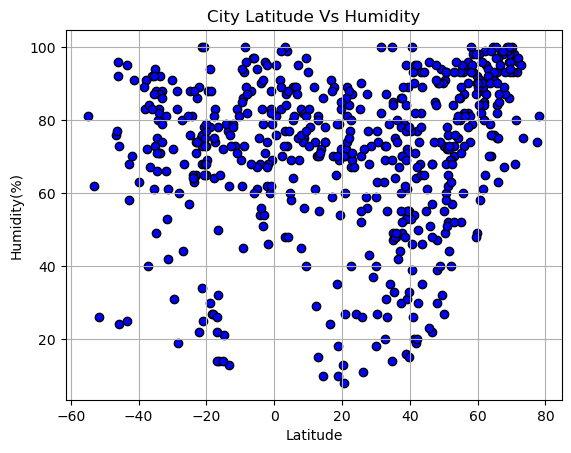

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor="blue", edgecolor= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude Vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

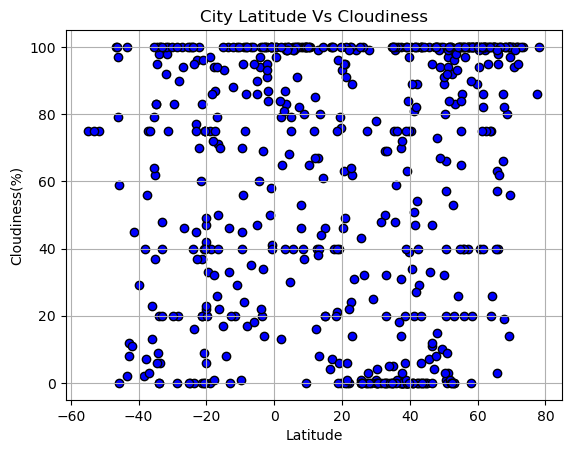

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor="blue", edgecolor= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude Vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

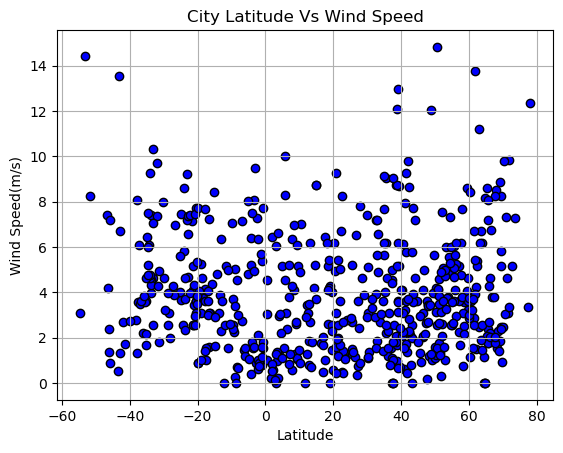

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor="blue", edgecolor= "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude Vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots

def lin_reg(data_df, column):
    x_values = data_df["Lat"]
    y_values = data_df[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print(f'The r value is {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(column)
    plt.show()

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8462548186825364


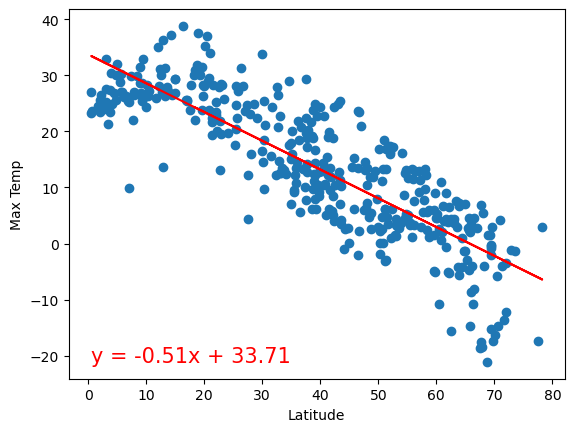

In [37]:
# Linear regression on Northern Hemisphere

lin_reg(data_df= northern_hemi_df, column= "Max Temp")


The r value is 0.6419546065421801


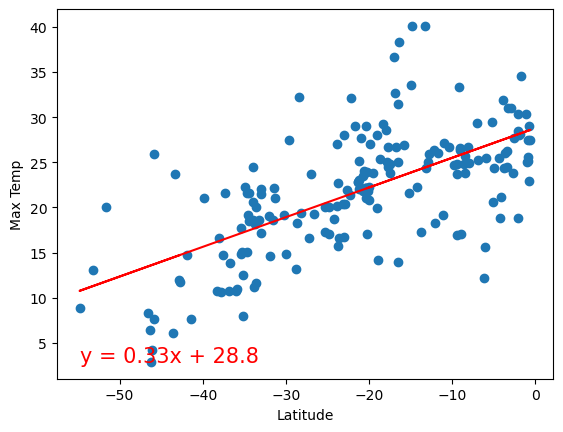

In [39]:
# Linear regression on Southern Hemisphere

lin_reg(data_df= southern_hemi_df, column= "Max Temp")


**Discussion about the linear relationship:** The regression plots demonstrate that temperature decreases as latitude increases, indicating it gets colder further from the equator. In the Northern Hemisphere, there's a strong negative correlation between temperature and latitude, while in the Southern Hemisphere, the correlation is positive. The warmest temperatures are found near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.2385317912939407


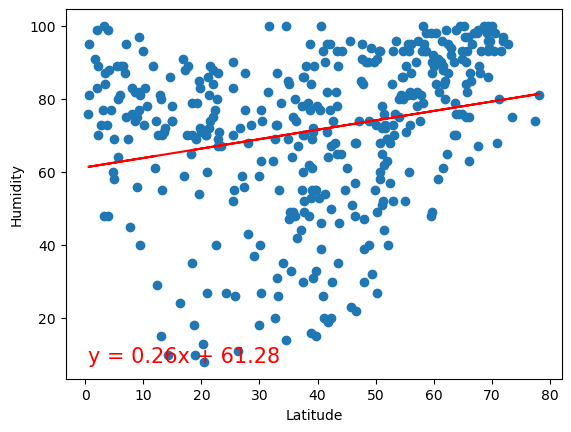

In [40]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Humidity")

The r value is 0.016759316950056818


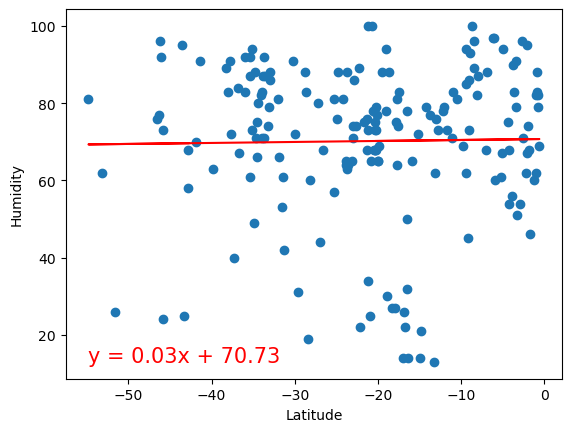

In [42]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Humidity")

**Discussion about the linear relationship:** The regression plots illustrate the relationship between latitude and humidity. They indicate a slight increase in humidity as one moves north from the equator, with a weak positive correlation suggested by the r-value. The data points are widely scattered, implying other factors influence humidity beyond latitude. In the Southern Hemisphere, the regression line is nearly horizontal, indicating a very weak positive correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.155004893876971


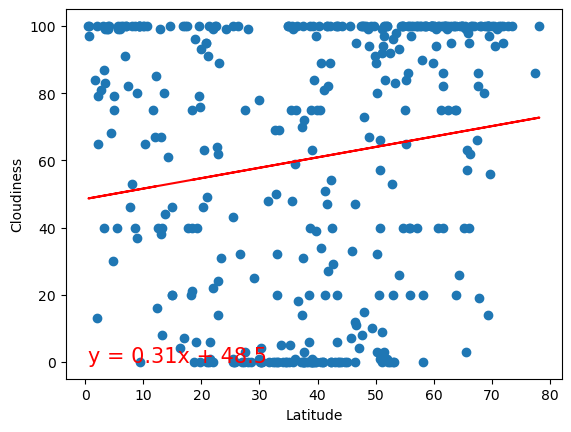

In [44]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Cloudiness")

The r value is 0.14341322916643243


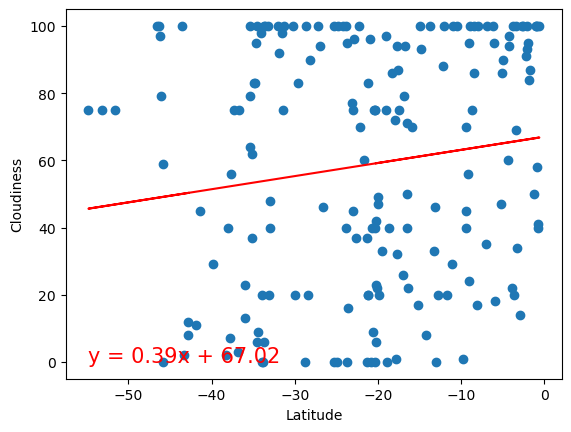

In [45]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Cloudiness")

**Discussion about the linear relationship:** The two plots above depict the relationship between latitude and cloudiness for both the Northern and Southern Hemispheres. The data shows a very weak positive correlation in both hemispheres, meaning that cloudiness slightly increases as latitude increases. However, the correlation is not strong, indicating that other factors likely play a significant role in determining cloudiness. The scattered nature of the data points suggests that latitude alone is not a reliable predictor of cloudiness, as variations can occur due to regional climatic conditions, weather patterns, and geographical features. Therefore, while there may be a slight trend toward increased cloudiness with higher latitudes, it is not a consistent or significant pattern across the dataset.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.1743466729090334


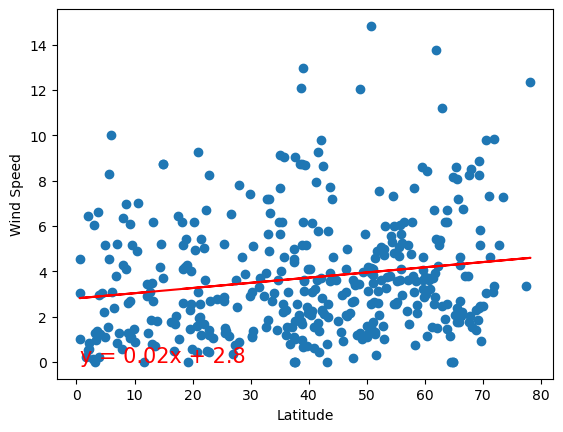

In [46]:
# Northern Hemisphere
lin_reg(data_df= northern_hemi_df, column= "Wind Speed")

The r value is -0.24947753546264592


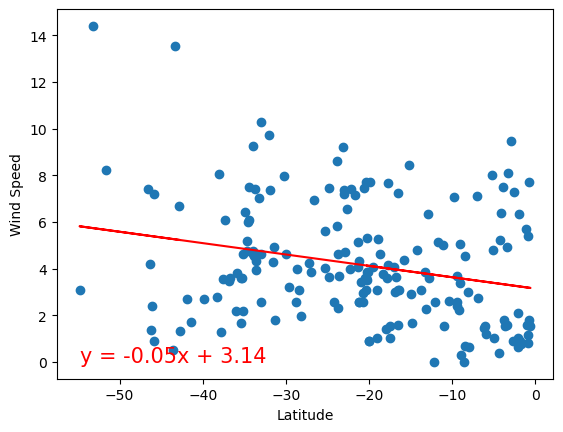

In [47]:
# Southern Hemisphere
lin_reg(data_df= southern_hemi_df, column= "Wind Speed")

**Discussion about the linear relationship:** The plots illustrate the relationship between wind speed and latitude. In the Northern Hemisphere, there is a very weak negative correlation, indicated by an almost horizontal slope, suggesting that wind speed does not significantly change with latitude. In the Southern Hemisphere, the negative correlation is slightly stronger, meaning wind speed tends to decrease more noticeably as one moves away from the equator. However, overall, the relationship between wind speed and latitude is weak in both hemispheres, implying that other factors are likely influencing wind speeds more significantly than latitude alone.